In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [19]:
import random
random.randint(1,5)

5

1. Load the data into R and name the columns to better identify the board (following an
ordering from left to right and from top to bottom). Check for missing values. 

In [2]:
df = pd.read_csv("tic-tac-toe.data.txt", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [3]:
print(df.isnull().sum())

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64


In [4]:
df_encoded = pd.get_dummies(df, columns=[0, 1, 2, 3, 4, 5, 6, 7, 8])
df_encoded.head()

,9,0_b,0_o,0_x,1_b,1_o,1_x,2_b,2_o,2_x,...,5_x,6_b,6_o,6_x,7_b,7_o,7_x,8_b,8_o,8_x
0,positive,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,1,0,0,1,0
1,positive,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,1,0
2,positive,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,1,0,0,0,1
3,positive,0,0,1,0,0,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0
4,positive,0,0,1,0,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0


In [5]:
df_encoded['target'] = df[9].apply(lambda x: 1 if x == 'positive' else 0)
df_encoded.drop(9, axis=1, inplace=True)
df_encoded.head()

,0_b,0_o,0_x,1_b,1_o,1_x,2_b,2_o,2_x,3_b,...,6_b,6_o,6_x,7_b,7_o,7_x,8_b,8_o,8_x,target
0,0,0,1,0,0,1,0,0,1,0,...,0,0,1,0,1,0,0,1,0,1
1,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,1,0,1
2,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,1,1
3,0,0,1,0,0,1,0,0,1,0,...,0,1,0,1,0,0,1,0,0,1
4,0,0,1,0,0,1,0,0,1,0,...,1,0,0,0,1,0,1,0,0,1


2. Read the "data splitting" section on the caret web page. Then split the data into 70%
training and 30% test by keeping the original class proportion (check
“createDataPartition()” function). 

In [6]:
# Stratified sampling ensures that the class distribution 
# in the training and test sets is representative of the original dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_encoded.iloc[:, :-1], df_encoded.iloc[:, -1], test_size=0.3, stratify=df_encoded.iloc[:, -1], random_state=42)


In [7]:
df.iloc[:, -1].value_counts(), y_train.value_counts(), y_test.value_counts()

(positive    626
 negative    332
 Name: 9, dtype: int64,
 1    438
 0    232
 Name: target, dtype: int64,
 1    188
 0    100
 Name: target, dtype: int64)

3. The values of the measures used for selecting the best model (by default, the accuracy
and/or the kappa measures are used for classification models) are printed by typing the
name of the model in the console

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, cohen_kappa_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score


classifiers = {
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Neural Network': MLPClassifier(random_state=42),
    'Nearest Neighbors': KNeighborsClassifier(),
    'SVM (Linear Kernel)': SVC(kernel='linear', random_state=42)
}

accuracy_scores = []
kappa_scores = []
auc_scores = []

for clf_name, clf in classifiers.items():
    accuracy_scorer = make_scorer(accuracy_score)
    kappa_scorer = make_scorer(cohen_kappa_score)

    accuracy = cross_val_score(clf, X_train, y_train, cv=5, scoring=accuracy_scorer).mean()
    kappa = cross_val_score(clf, X_train, y_train, cv=5, scoring=kappa_scorer).mean()
    auc = cross_val_score(clf, X_train, y_train, cv=5, scoring='roc_auc').mean()
    
    auc_scores.append(auc)
    accuracy_scores.append(accuracy)
    kappa_scores.append(kappa)

/home/anna/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/anna/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/anna/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/anna/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/anna/.local/lib/python3.10/site-packages/sklearn/n

In [9]:
pd.DataFrame({'Classifier': list(classifiers.keys()), 'accuracy': accuracy_scores, "kappa": kappa_scores, "auc":auc_scores})
# result for cross validation cv=5, on test dataset, not whole dataset 

,Classifier,accuracy,kappa,auc
0,Naive Bayes,0.664179,0.247395,0.742380
1,Decision Tree,0.928358,0.841585,0.919979
2,Neural Network,0.977612,0.950168,0.993541
3,Nearest Neighbors,0.916418,0.809172,0.973263
4,SVM (Linear Kernel),0.985075,0.966536,0.985776


4. Print the confusion matrix of each model and observe the information it provides. 

In [10]:
from sklearn.metrics import confusion_matrix

confusion_matrices = {}
for clf_name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[clf_name] = cm
print("\nConfusion Matrices for test set:")
print(confusion_matrices)



Confusion Matrices for test set:
{'Naive Bayes': array([[ 44,  56],
       [ 38, 150]]), 'Decision Tree': array([[ 87,  13],
       [ 12, 176]]), 'Neural Network': array([[ 95,   5],
       [  0, 188]]), 'Nearest Neighbors': array([[ 85,  15],
       [  3, 185]]), 'SVM (Linear Kernel)': array([[ 94,   6],
       [  0, 188]])}


/home/anna/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


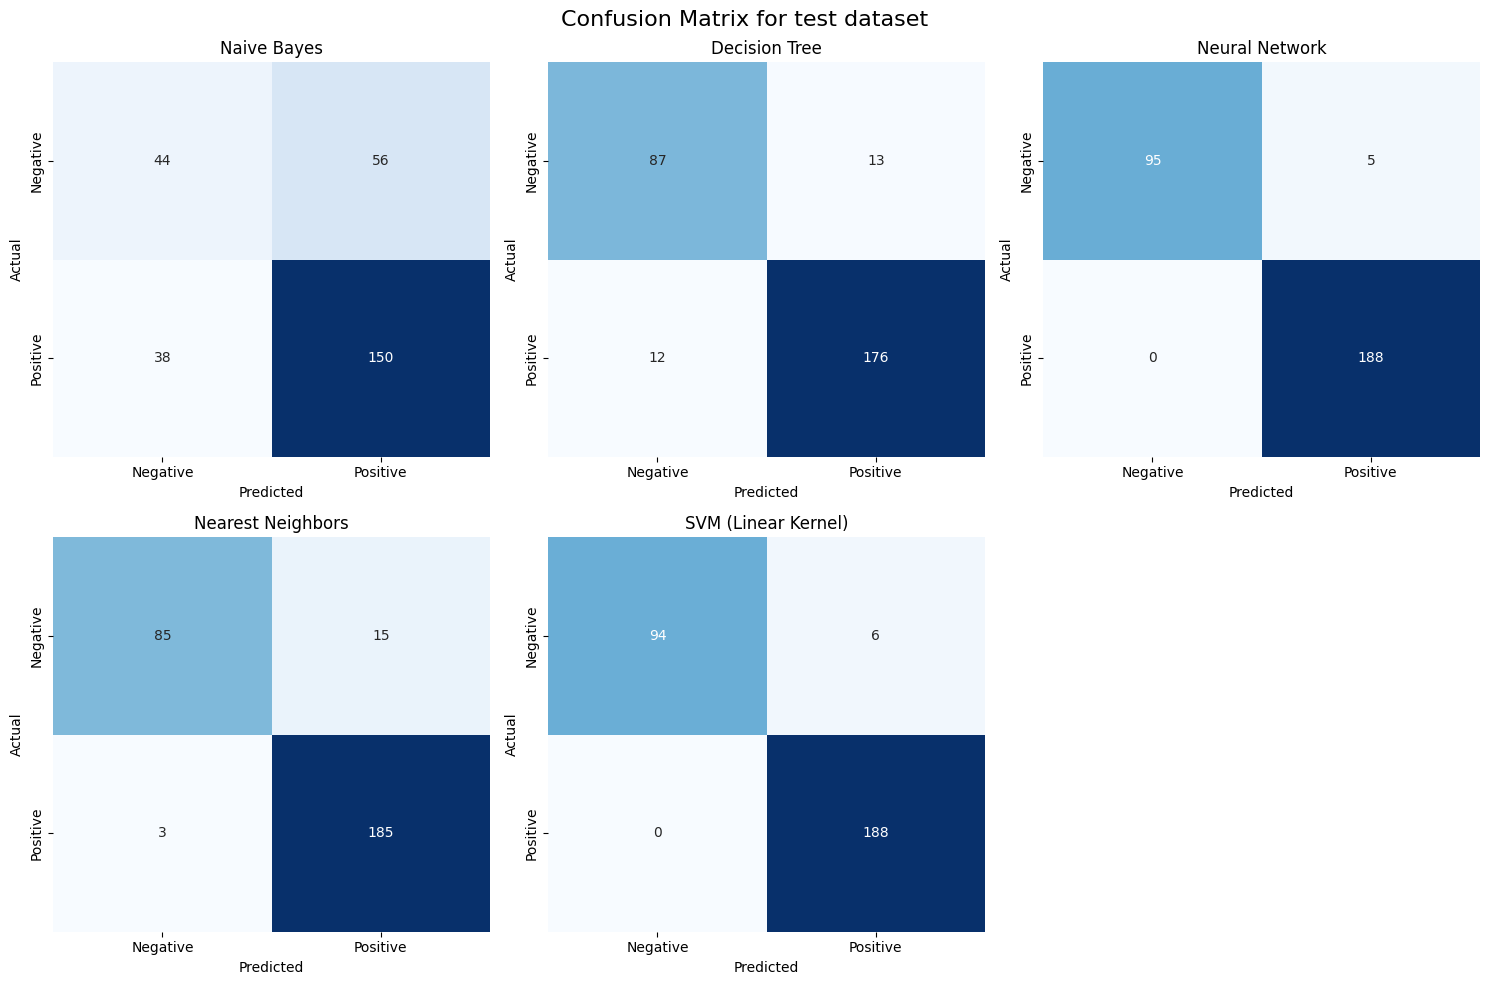

In [11]:
import seaborn as sns

plt.figure(figsize=(15, 10))
plt.suptitle('Confusion Matrix for test dataset', fontsize=16)

for i, (clf_name, cm) in enumerate(confusion_matrices.items(), 1):
    plt.subplot(2, 3, i)
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False,
                xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f'{clf_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()


5. Plot the ROC curves of the models.

/home/anna/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


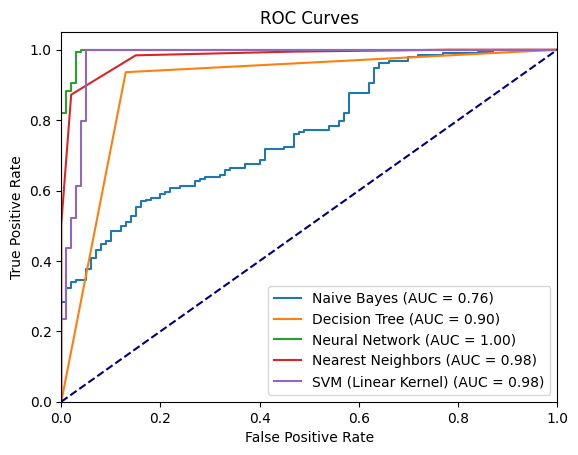

In [12]:
from sklearn.metrics import roc_curve, auc

for clf_name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    if hasattr(clf, "predict_proba"):
        y_score = clf.predict_proba(X_test)[:, 1]
    else:  # For classifiers without predict_proba, use decision function
        y_score = clf.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{clf_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()
